# Preentrega - Proyecto Data Science


# Educacion superior vinculada a calidad de acceso al mercado laboral

Profesor: Jorge Ruiz


Tutor: Lucila Adanchú

Alumno: Maria Cecilia Zubin


Comision: 61615

# Acceso a los datos


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv('/content/dataset/dataset original.csv',encoding='latin-1', delimiter=';')

# Informacion del Dataset

In [ ]:
df.head()

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
0,231,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,8/9/2015,M,FORM,Analista de Mantenimiento,6,NO,AMT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,487369,633580,760296
1,236,ACTI,Dentro de convenio,CC-781,27 Hs. CATEGORIA OP. A CCT 781,OP27,14/9/2015,F,FORM,Operador,8,NO,CDT,44,BANCO HIPOTECARIO S.A.,226936,251899,251899
2,1420,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,2/2/2009,F,CBA,Team Leader Operaciones,7,NO,TLC,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,481271,625652,750782
3,1444,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,2/2/2009,F,CBA,Operador,8,NO,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
4,1470,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/2/2009,F,CBA,Operador,8,NO,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351


In [ ]:
print(df.dtypes)

Legajo              int64
Estado             object
Estructura         object
Convenio           object
Categoria          object
ID_Cat             object
Ingreso            object
Sexo               object
provincia          object
puesto             object
piramide            int64
Titulo             object
ID_PuestoBasico    object
ID_Banco            int64
Banco              object
Enero               int64
Febrero             int64
Marzo               int64
dtype: object


# Descripcion de Variables

Legajo: numero identificador del empleado, ID univoco que no se repite dentro del dataset.

Estado: hace referencia a si el empleado se encuentra activo al momento del armado del dataset.

Estructura: detalla la estructura de liquidación bajo la cual se encuentra contenido el empleado. Los puestos asociados a staff, analistas, supervisores, responsables, etc., son los asociados al personal fuera de convenio. El personal que realiza tareas operativas detalladas explícitamente en una convención colectiva de trabajo nomenclada y registrada como tal, están asociados al personal dentro de convenio. [Fuera de convenio, Dentro de convenio]

Convenio: detalla los posibles convenios al que puede pertenecer el empleado [FCON,CC-781,ATCC]
Categoría: detalla la categoría a la que pertenece el empleado

ID_Cat: código de la categoría del empleado. Se detalla la codificacion de cada una de las categorias

Ingreso: fecha de ingreso del empleado a la empresa.

Sexo: sexo del empleado [M: Hombre, F: Mujer]

Provincia: sucursal en la que el empleado se encuentra actualmente prestando servicios [FORM,CBA, CABA2]

Puesto: se detallan las codificaciones y puestos de todo el personal

Pirámide: detalla el nivel de jerarquía en el organigrama de la empresa, siendo 8 el valor que se ubica en la base de la piramide y 0 el ultimo valor de la cima de la misma [0,1,2,3,4,5,6,7,8]

Título: hace referencia a la posesión del mismo [SI,NO]

ID_PuestoBasico: código del puesto del empleado.

ID Banco: código del banco donde el empleado percibe sus haberes.




# Desctipcion del Dataset

En la descripcion del dataset, al solicitar el detalle de cada tipo de variable, se observa, que esta leyendo tres columnas que poseen datos de sueldo, por ende son numericas, como de tipo objeto. Por tal motivo se procede a la correccion de las mismas.

In [3]:
columnas_objeto = df.select_dtypes(include=['object']).columns
print("Columnas que Pandas interpreta como 'object':\n", columnas_objeto)

Columnas que Pandas interpreta como 'object':
 Index(['Estado', 'Estructura', 'Convenio', 'Categoria', 'ID_Cat', 'Ingreso',
       'Sexo', 'provincia', 'puesto', 'Titulo ', 'ID_PuestoBasico', 'Banco'],
      dtype='object')


In [4]:
df['Legajo'] = df['Legajo'].astype(str)

In [5]:
print(df['Legajo'].dtype)

object


Se modifica el tipo de dato del legajo de numero a texto, para que no genere distorsion a nivel estadistico, debido a que no es un valor numerico relevante en este caso

In [6]:
print(df.dtypes)

Legajo             object
Estado             object
Estructura         object
Convenio           object
Categoria          object
ID_Cat             object
Ingreso            object
Sexo               object
provincia          object
puesto             object
piramide            int64
Titulo             object
ID_PuestoBasico    object
ID_Banco            int64
Banco              object
Enero               int64
Febrero             int64
Marzo               int64
dtype: object


In [7]:
df.shape

(2205, 18)

El dataset obtenido posee 2205 filas y 18 columnas

In [8]:
df.duplicated().value_counts()

,count
False,2205


El dataset no posee filas repetidas.

In [9]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Legajo           2205 non-null   object
 1   Estado           2205 non-null   object
 2   Estructura       2205 non-null   object
 3   Convenio         2205 non-null   object
 4   Categoria        2205 non-null   object
 5   ID_Cat           2205 non-null   object
 6   Ingreso          2205 non-null   object
 7   Sexo             2205 non-null   object
 8   provincia        2205 non-null   object
 9   puesto           2205 non-null   object
 10  piramide         2205 non-null   int64 
 11  Titulo           2205 non-null   object
 12  ID_PuestoBasico  2205 non-null   object
 13  ID_Banco         2205 non-null   int64 
 14  Banco            2205 non-null   object
 15  Enero            2205 non-null   int64 
 16  Febrero          2205 non-null   int64 
 17  Marzo            2205 non-null   

analisis de valores nulos, no posee.


In [10]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Legajo           2205 non-null   object
 1   Estado           2205 non-null   object
 2   Estructura       2205 non-null   object
 3   Convenio         2205 non-null   object
 4   Categoria        2205 non-null   object
 5   ID_Cat           2205 non-null   object
 6   Ingreso          2205 non-null   object
 7   Sexo             2205 non-null   object
 8   provincia        2205 non-null   object
 9   puesto           2205 non-null   object
 10  piramide         2205 non-null   int64 
 11  Titulo           2205 non-null   object
 12  ID_PuestoBasico  2205 non-null   object
 13  ID_Banco         2205 non-null   int64 
 14  Banco            2205 non-null   object
 15  Enero            2205 non-null   int64 
 16  Febrero          2205 non-null   int64 
 17  Marzo            2205 non-null   

# Columnas Categoricas

In [11]:
df.describe(include = 'object').T

,count,unique,top,freq
Legajo,2205,2205,231,1
Estado,2205,1,ACTI,2205
Estructura,2205,2,Dentro de convenio,1789
Convenio,2205,3,ATCC,1398
Categoria,2205,17,"36,0 Hs. CATEGORIA 3 CCT688/14",616
ID_Cat,2205,17,H01,616
Ingreso,2205,649,1/8/2022,45
Sexo,2205,2,F,1564
provincia,2205,3,CBA,1620
puesto,2205,71,Operador,1789


# Columnas Numericas

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
piramide,2205.0,7.600000,0.993902,0.0,8.0,8.0,8.0,8.0
ID_Banco,2205.0,54.562812,32.542047,7.0,27.0,72.0,72.0,150.0
Enero,2205.0,333951.576871,204889.529095,168101.0,262479.0,306225.0,314974.0,4668357.0
Febrero,2205.0,388366.269841,274046.567680,186592.0,291351.0,339910.0,349622.0,6068864.0
Marzo,2205.0,411957.604082,338883.543822,186592.0,291351.0,339910.0,349622.0,6982637.0


# Filtrado de valores absolutos

In [13]:
df = df[(df['Enero'] > 0) & (df['Febrero'] >= 0) & (df['Marzo'] > 0)]

El dataset esta basado en datos de sueldo por lo cual ningun valor pordria ser negativo.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.ticker import FormatStrFormatter
from seaborn import boxplot, distplot

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Resumen del Dataset

El dataset obtenido de la base de datos posee 2205 filas y 18 columnas, de
las cuales 18 (dieciocho) son variables independientes a analizar y 1 (una)
corresponde a la variable target o dependiente.

De las 18 (dieciocho) variables independientes, 13 (trece) son categóricas (Legajo, Estado, Estructura, convenio, categoria, ID_cat, Ingreso, Sexo, provincia, puesto, Ttulo, ID_PuestoBasico, Banco) y 5 (cinco) son
numéricas (piramide, ID_Banco, Enero, Febrero, Marzo ). La
variable target (Titulo) es la que se binarizara

Si bien para la primera interacion se plantean tres (3) hipotesis, para la segunda, en la prueba del modelo, se desarrollara la primera.

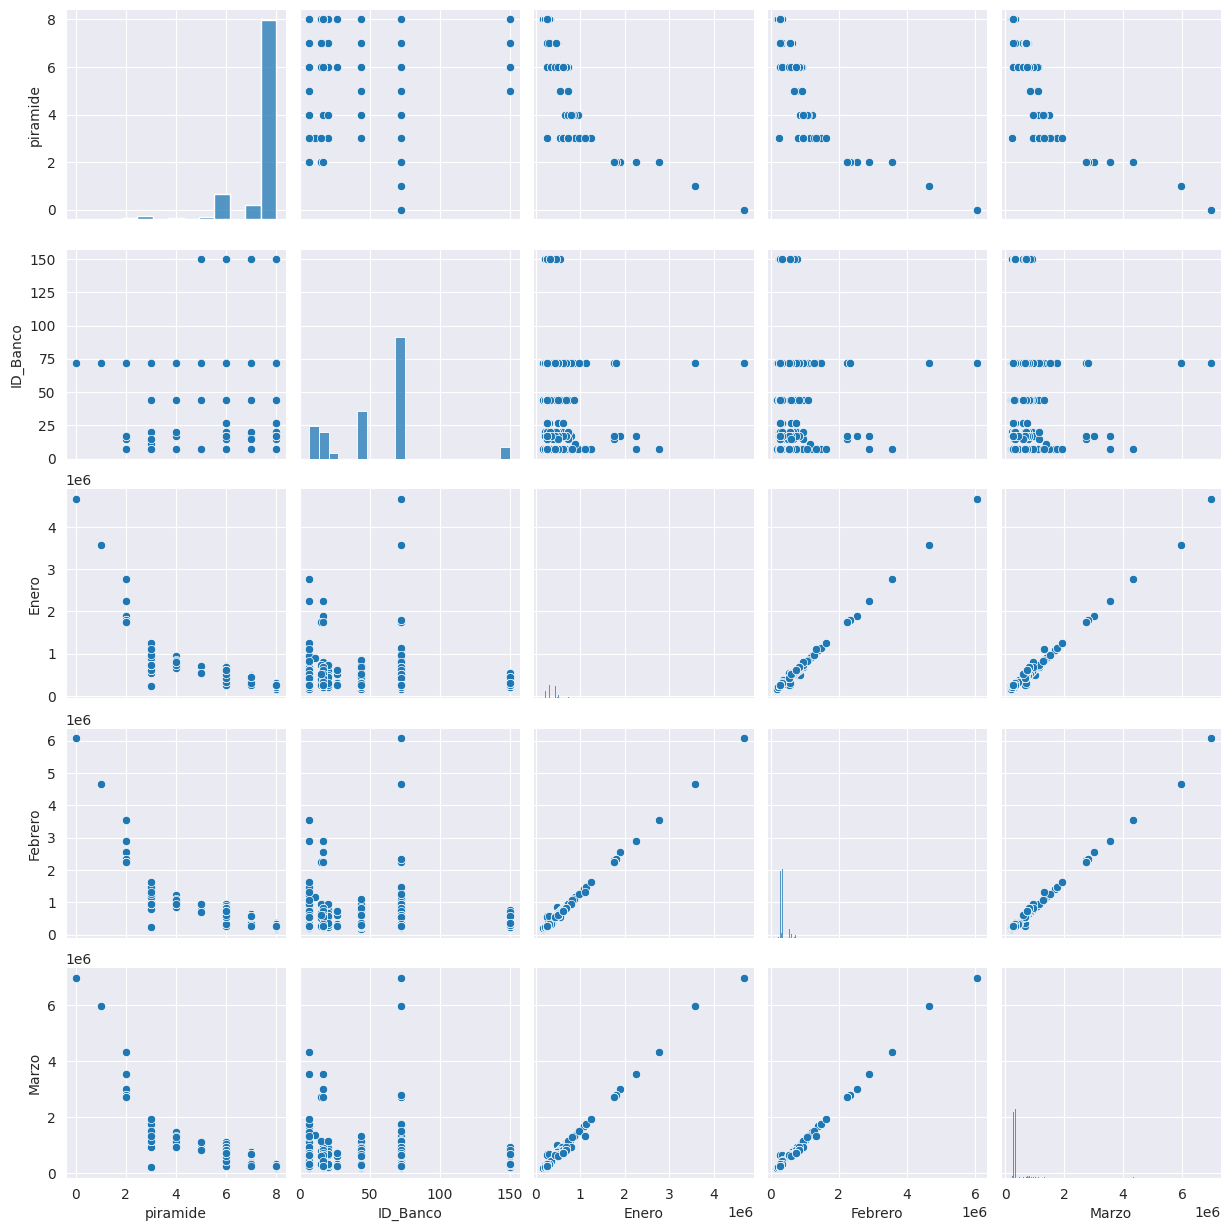

In [16]:
sns.pairplot(df)
plt.show()

# Analisis de variables numericas


Planteo de Hipotesis


Hipótesis Nº1: El poseer un titulo universitario es un factor determinante para tener acceso a puestos jerárquicos, por ende, de mayor ingreso.

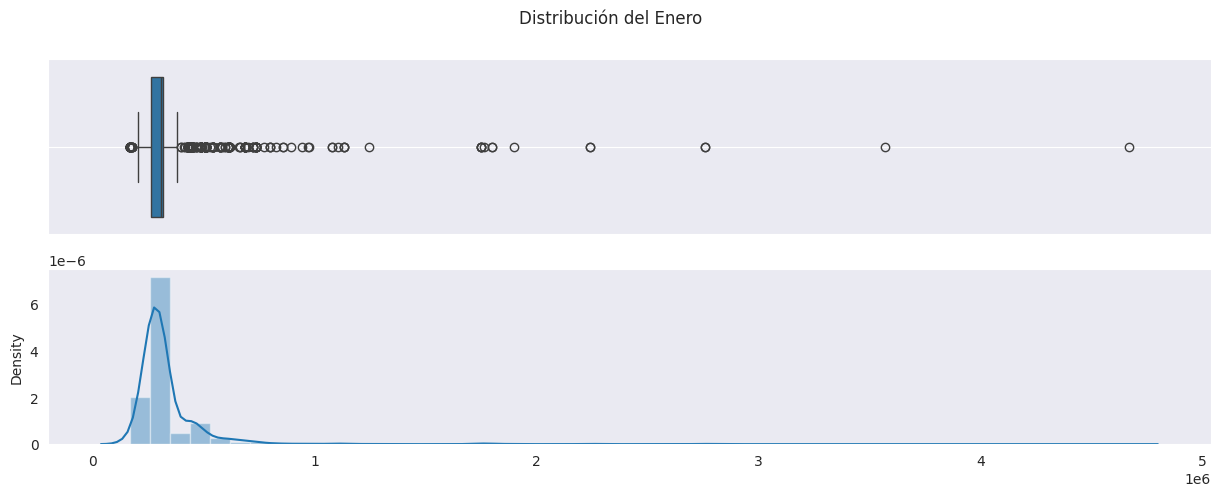

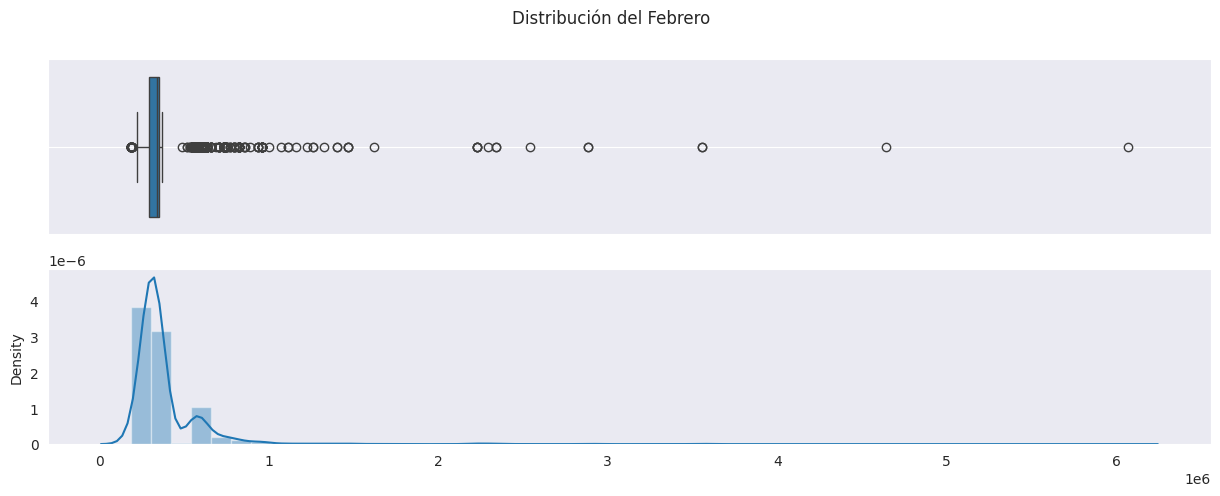

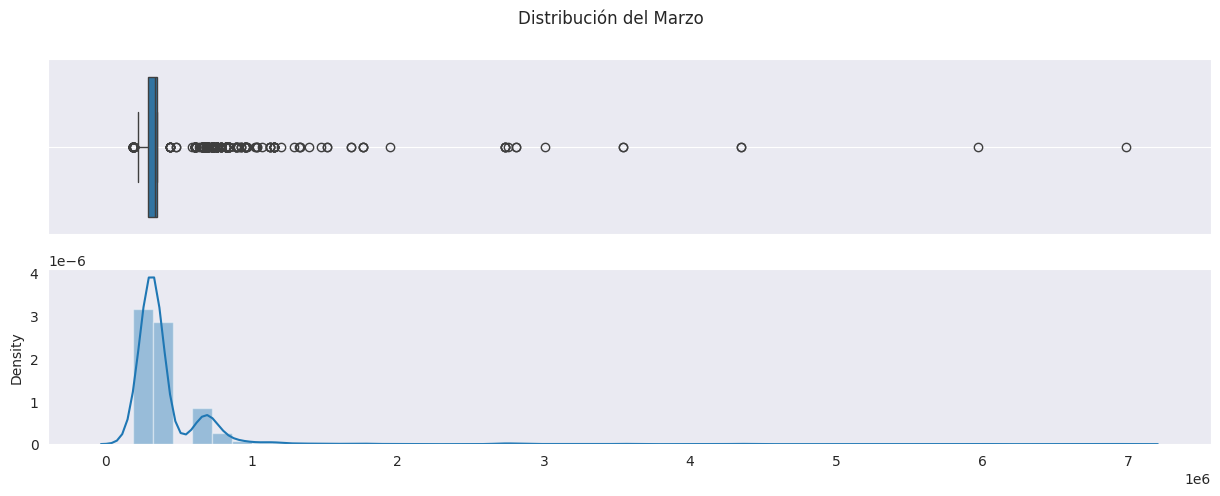

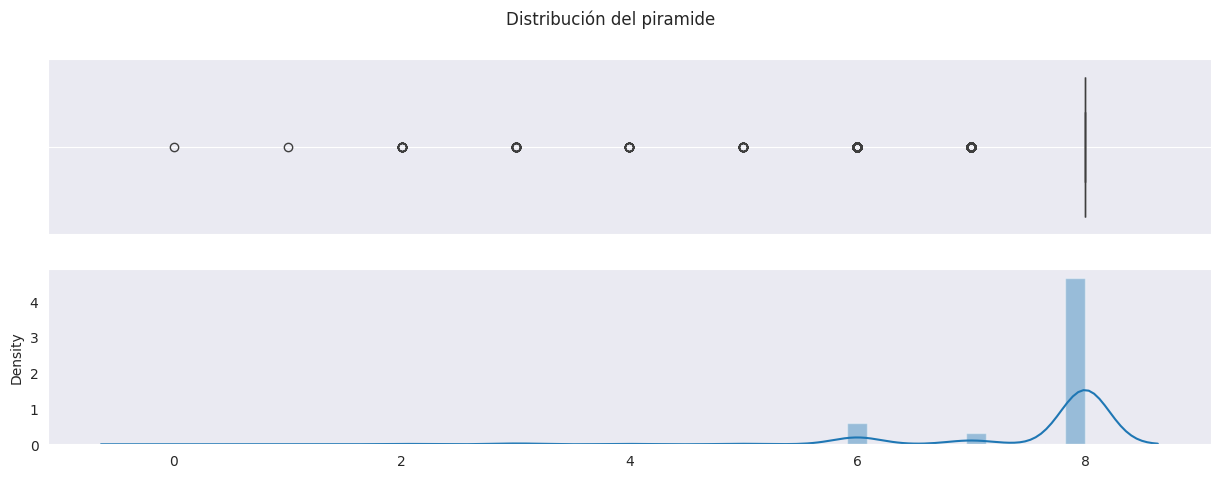

In [17]:
numerical_features = ['Enero', 'Febrero', 'Marzo', 'piramide']
for _, feature in enumerate(numerical_features):
    fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
    fig.suptitle(f'Distribución del {feature}')
    sns.boxplot(x = df[feature], ax = axes[0])
    sns.distplot(x = df[feature], ax = axes[1])
    axes[0].grid()
    axes[1].grid()
    plt.show()

In [18]:
import numpy as np
for feature in numerical_features:
    quartiles = np.percentile(df[feature], [25, 50, 75])
    print(f"Cuartiles para {feature}:")
    print(f"Q1: {quartiles[0]}")
    print(f"Q2 (Mediana): {quartiles[1]}")
    print(f"Q3: {quartiles[2]}")
    print("----")


Cuartiles para Enero:
Q1: 262479.0
Q2 (Mediana): 306225.0
Q3: 314974.0
----
Cuartiles para Febrero:
Q1: 291351.0
Q2 (Mediana): 339910.0
Q3: 349622.0
----
Cuartiles para Marzo:
Q1: 291351.0
Q2 (Mediana): 339910.0
Q3: 349622.0
----
Cuartiles para piramide:
Q1: 8.0
Q2 (Mediana): 8.0
Q3: 8.0
----


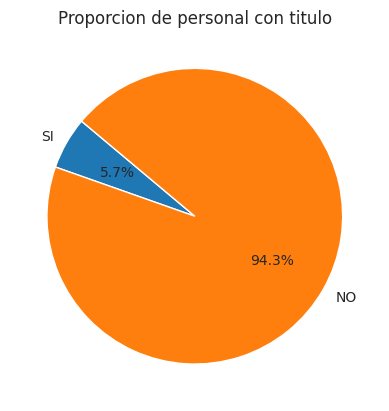

In [19]:
labels = ['SI', 'NO']
sizes = [126, 2079]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporcion de personal con titulo')
plt.show()


Como puede visualizarse en los graficos, se comprueba la hipotesis nº1, debido a que los mayores ingresos estan concetrados en la parte superior de la piradmide organizativa, al igual que el tipo de jerarquia de los puestos, en esos casos lo que caracteriza a la poblacion es que poseen titulo universitario.

<Figure size 1200x600 with 0 Axes>

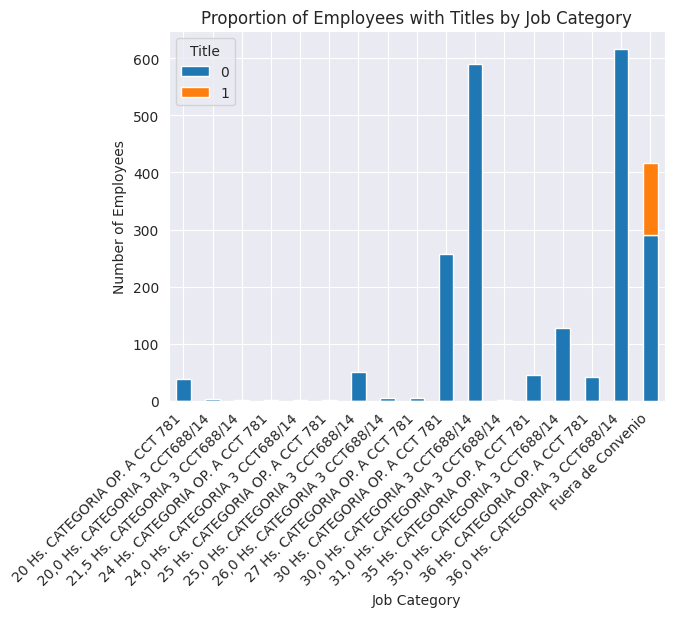

In [62]:
# @title Proporcion de empleados con titulo segun su categoria

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'
title_counts = df.groupby(['Categoria', 'Titulo ']).size().unstack()

plt.figure(figsize=(12, 6))
title_counts.plot(kind='bar', stacked=True)
plt.xlabel('Job Category')
plt.ylabel('Number of Employees')
plt.title('Proportion of Employees with Titles by Job Category')
plt.xticks(rotation=45, ha='right')
_ = plt.legend(title='Title')

Hipótesis Nº2: La ubicación geográfica del empleado influye en la obtención de un título universitario.

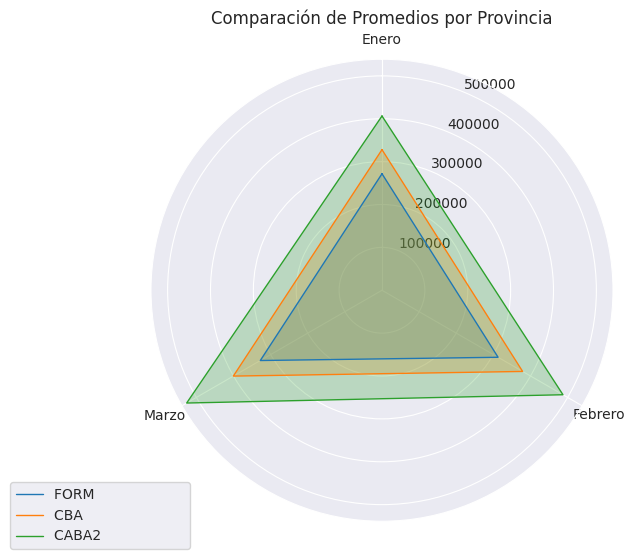

In [20]:
import matplotlib.pyplot as plt
import numpy as np
provincias = df['provincia'].unique()
promedios = {}
for provincia in provincias:
    promedios[provincia] = df[df['provincia'] == provincia][['Enero', 'Febrero', 'Marzo']].mean()
categorias = list(promedios[provincias[0]].index)
valores = [[promedios[provincia][categoria] for categoria in categorias] for provincia in provincias]
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

for i, provincia in enumerate(provincias):
    valores_provincia = valores[i]
    valores_provincia += valores_provincia[:1]
    ax.plot(angulos, valores_provincia, linewidth=1, linestyle='solid', label=provincia)
    ax.fill(angulos, valores_provincia, alpha=0.25)

ax.set_xticks(angulos[:-1])
ax.set_xticklabels(categorias)
ax.set_title('Comparación de Promedios por Provincia')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


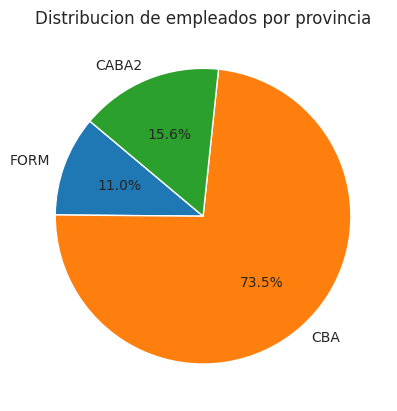

In [21]:
labels = ['FORM', 'CBA','CABA2']
sizes = [242,1620, 343]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion de empleados por provincia')
plt.show()


La poblacion que posee una cantidad superior de Titulos universitarios, se encuentran en la provincia de Cordoba. La Universidad Nacional de Córdoba es una universidad pública de Argentina. Tiene sede en la ciudad de Córdoba. Fundada el 19 de junio de 1613, es la más antigua del país y una de las primeras de América. Su enseñanza es libre, gratuita y laica. Por tal  motivo, puede inferirse, que la hipotesis se cumpliria.

Hipótesis Nº3: La población  de sexo femenino que posee título universitario es mayor, que la población de sexo masculino,

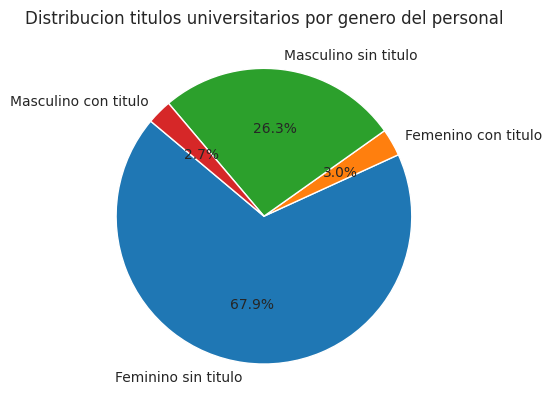

In [ ]:
labels = ['Feminino sin titulo', 'Femenino con titulo','Masculino sin titulo','Masculino con titulo']
sizes = [1498,66,581,60]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribucion titulos universitarios por genero del personal')
plt.show()


Del total de poblacion de 2205 empleados, siendo 1564 de sexo femenino, 641 de sexo masculino. De los cuales en el caso del pesonal femenino, 1498 no poseen titulo universitario, mientras que 66 de ellas, si lo posee. Para el caso de la poblacion masculina, 581 son los que no poseen titulo universitario, mientras que 60 son lo que si lo poseen.

# Detalle del Modelo

En esta segunda interaccion, direccionada al proyecto final, Se propone realizar un modelo de clasificación binaria, realizando
previamente un análisis de los datos persistidos en la base, tanto de la integridad de
los mismos como de su poder predictivo para la variable target a inferir. Se
seleccionará aquel modelo que no solo brinde el mayor accuracy sobre el set de
validación, sino que se prestará especial atención en el valor del recall buscando
que el mismo tienda a 1

# Feature Engineering

•	En una primera iteración, se dispuso a encodear las variables categóricas ordinales en enteros representativos y las nominales se binarizaron en 0 y 1

In [68]:
df

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
0,231,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,8/9/2015,1,FORM,Analista de Mantenimiento,6,0,AMT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,487369,633580,760296
1,236,ACTI,Dentro de convenio,CC-781,27 Hs. CATEGORIA OP. A CCT 781,OP27,14/9/2015,0,FORM,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,226936,251899,251899
2,1420,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,2/2/2009,0,CBA,Team Leader Operaciones,7,0,TLC,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,481271,625652,750782
3,1444,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,2/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
4,1470,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,244583,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2201,244584,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2202,244585,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2203,244587,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,1,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887


# Analisis de las variables piramide vs. titulo

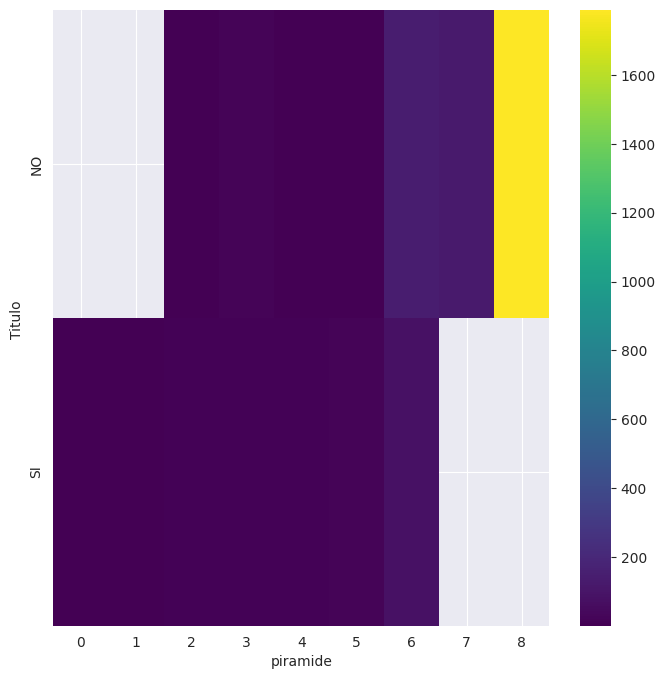

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Titulo '].value_counts()
    for x_label, grp in df.groupby('piramide')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('piramide')
_ = plt.ylabel('Titulo ')

# Detalle de variables para iniciar el balanceo del dataset

In [24]:
print(df.columns)

Index(['Legajo', 'Estado', 'Estructura', 'Convenio', 'Categoria', 'ID_Cat',
       'Ingreso', 'Sexo', 'provincia', 'puesto', 'piramide', 'Titulo ',
       'ID_PuestoBasico', 'ID_Banco', 'Banco', 'Enero', 'Febrero', 'Marzo'],
      dtype='object')


In [25]:
df['Sexo'].replace(['F', 'M'], [0,1], inplace=True)
df['provincia'].replace(['CBA','CABA2','FORM'], [1,2,3], inplace=True)
df['Titulo '].replace(['NO', 'SI'], [0,1], inplace=True)
df

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
0,231,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,8/9/2015,1,FORM,Analista de Mantenimiento,6,0,AMT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,487369,633580,760296
1,236,ACTI,Dentro de convenio,CC-781,27 Hs. CATEGORIA OP. A CCT 781,OP27,14/9/2015,0,FORM,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,226936,251899,251899
2,1420,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,2/2/2009,0,CBA,Team Leader Operaciones,7,0,TLC,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,481271,625652,750782
3,1444,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,2/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
4,1470,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,244583,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2201,244584,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2202,244585,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2203,244587,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,1,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887


# Balanceo del dataset

In [26]:
df['Titulo '].value_counts()

,count
Titulo,
0,2079
1,126


In [27]:
title_df = df[df['Titulo '] == 1]
title_df

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
18,2171,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,1/10/2005,0,CABA2,Gerente de Legales,2,1,GLE,72,BANCO SANTANDER RIO S.A.,1763954,2293140,2751768
20,2312,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,14/9/2015,0,FORM,Analista de Calidad,6,1,CAL,44,BANCO HIPOTECARIO S.A.,427649,555944,667133
29,2348,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,19/1/2016,0,FORM,Analista de Calidad,6,1,CAL,44,BANCO HIPOTECARIO S.A.,427649,555944,667133
31,2365,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,4/4/2016,1,CBA,Analista de Planeamiento Oper.,6,1,APO,44,BANCO HIPOTECARIO S.A.,446398,580317,696380
32,2371,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,4/4/2016,1,FORM,Analista Soporte Estratégico Operativo,6,1,SEO,44,BANCO HIPOTECARIO S.A.,427649,555944,667133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,244091,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,3/2/2020,0,CABA2,Analista de Calidad & Capacit.,6,1,ACC,72,BANCO SANTANDER RIO S.A.,427649,555944,667133
2012,244150,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,25/1/2021,1,CABA2,Analista de Soporte Tecnico,6,1,AST,72,BANCO SANTANDER RIO S.A.,252151,555944,667133
2022,244180,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,1/3/2021,0,CABA2,Coordinador,4,1,COO,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,800016,960020,960020
2045,244264,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,14/5/2021,0,CABA2,Coordinador,4,1,COO,72,BANCO SANTANDER RIO S.A.,800016,960020,960020


In [28]:
not_title_df = df[df['Titulo '] == 0]
not_title_df


,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
0,231,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,8/9/2015,1,FORM,Analista de Mantenimiento,6,0,AMT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,487369,633580,760296
1,236,ACTI,Dentro de convenio,CC-781,27 Hs. CATEGORIA OP. A CCT 781,OP27,14/9/2015,0,FORM,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,226936,251899,251899
2,1420,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,2/2/2009,0,CBA,Team Leader Operaciones,7,0,TLC,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,481271,625652,750782
3,1444,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,2/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
4,1470,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/2/2009,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,244583,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2201,244584,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2202,244585,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887
2203,244587,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,17/1/2024,1,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887


In [29]:
sample_not_title_df = not_title_df.sample(len(title_df), random_state = 42)
sample_not_title_df

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
1419,25674,ACTI,Dentro de convenio,ATCC,"25,0 Hs. CATEGORIA 3 CCT688/14",H23,6/11/2023,1,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,218732,242793,242793
2130,244481,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,3/7/2023,1,CABA2,Analista,6,0,ANL,72,BANCO SANTANDER RIO S.A.,511694,614033,614033
651,16789,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,5/4/2022,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
34,2379,ACTI,Dentro de convenio,CC-781,35 Hs. CATEGORIA OP. A CCT 781,OP35,21/6/2016,0,FORM,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,294176,326535,326535
465,16337,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,18/3/2019,1,CBA,Operador,8,0,CDT,150,HSBC BANK ARGENTINA S.A.,262479,291351,291351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,241539,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,23/1/2013,0,CBA,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,262479,291351,291351
532,16560,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,6/1/2021,1,CBA,Team Leader Operaciones,7,0,TLC,72,BANCO SANTANDER RIO S.A.,446398,580317,696380
1832,242974,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,24/4/2015,1,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351
395,16075,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,13/7/2017,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351


In [36]:
balanced_df = pd.concat([title_df, sample_not_title_df ]).sample(frac = 1, random_state=42)
balanced_df

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
1460,25727,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,19/1/2024,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
59,2458,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,27/3/2017,1,FORM,Coordinador Planea. Operativo,4,1,CPO,44,BANCO HIPOTECARIO S.A.,737087,958213,1149856
1913,243415,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,22/8/2017,1,CBA,Analista de Relaciones Labor.,6,1,ARL,150,HSBC BANK ARGENTINA S.A.,446398,580317,696380
876,21997,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,18/1/2018,0,CBA,Operador,8,0,CDT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,262479,291351,291351
1940,243653,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,6/11/2018,0,CABA2,Analista de Calidad & Capacit.,6,1,ACC,72,BANCO SANTANDER RIO S.A.,252151,555944,667133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,243206,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,18/3/2016,0,CBA,Jefe Administracion de Personal y Novedades,3,1,JAN,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,1245886,1619652,1943582
285,14340,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,1/2/2010,1,CBA,Analista Soporte Estratégico Operativo,6,1,SEO,72,BANCO SANTANDER RIO S.A.,446398,580317,696380
1714,241984,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,10/3/2014,0,CBA,Analista de Calidad & Capacit.,6,1,ACC,44,BANCO HIPOTECARIO S.A.,427649,555944,667133
1222,25381,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,1/8/2022,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351


In [65]:
from sklearn.utils import resample

title_df = df[df['Titulo '] == 1]
title_df
not_title_df = df[df['Titulo '] == 0]
not_title_df

title_df_over = resample(not_title_df,
                               replace=True,
                               n_samples=len(title_df),
                               random_state=42)


balanced_df = pd.concat([title_df, title_df_over])


balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['Titulo '].value_counts())


Titulo 
0    126
1    126
Name: count, dtype: int64


# Correlacion entre piramide y titulo

In [ ]:
df['piramide'].corr(df['Titulo '])

-0.612688975483467

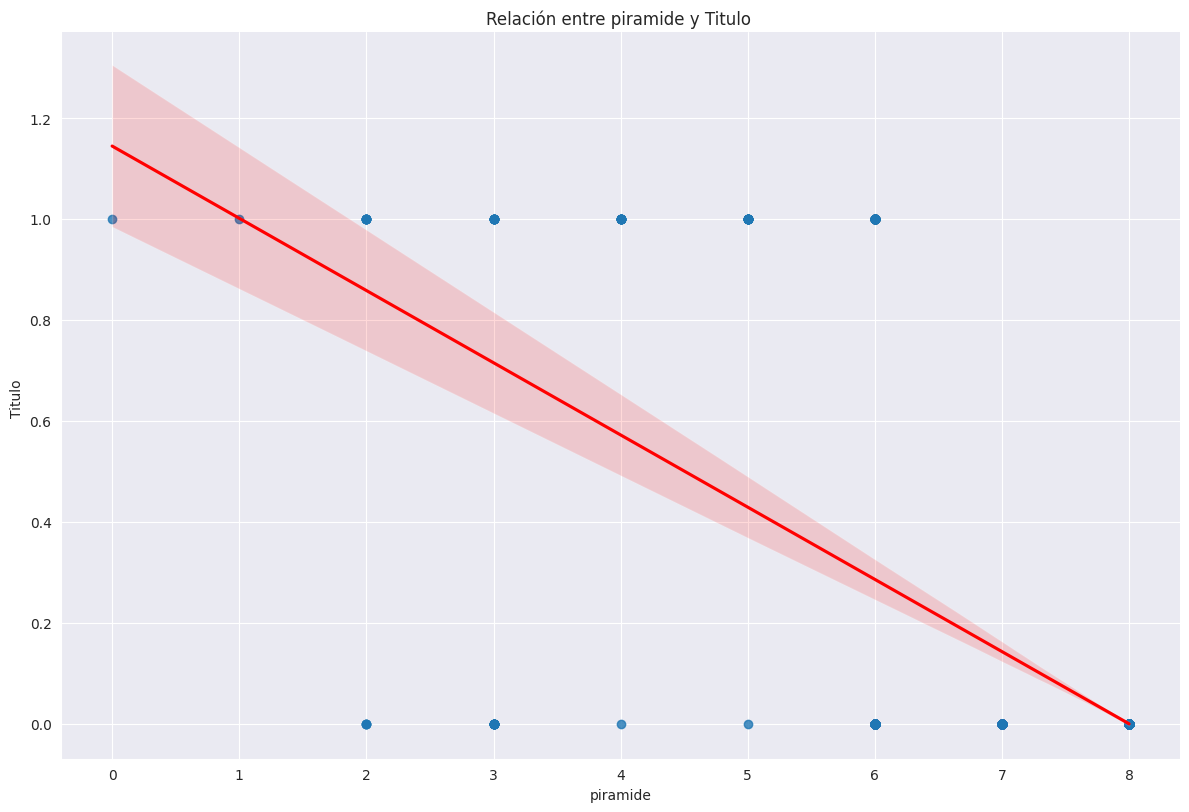

In [ ]:
sns.lmplot(data=df, x='piramide', y='Titulo ', line_kws={'color': 'r'}, height=8, aspect=1.5)
plt.title('Relación entre piramide y Titulo ')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Correlacion entre Sexo y Titulo

In [ ]:
df['Sexo'].corr(df['Titulo '])

0.10056201034288145

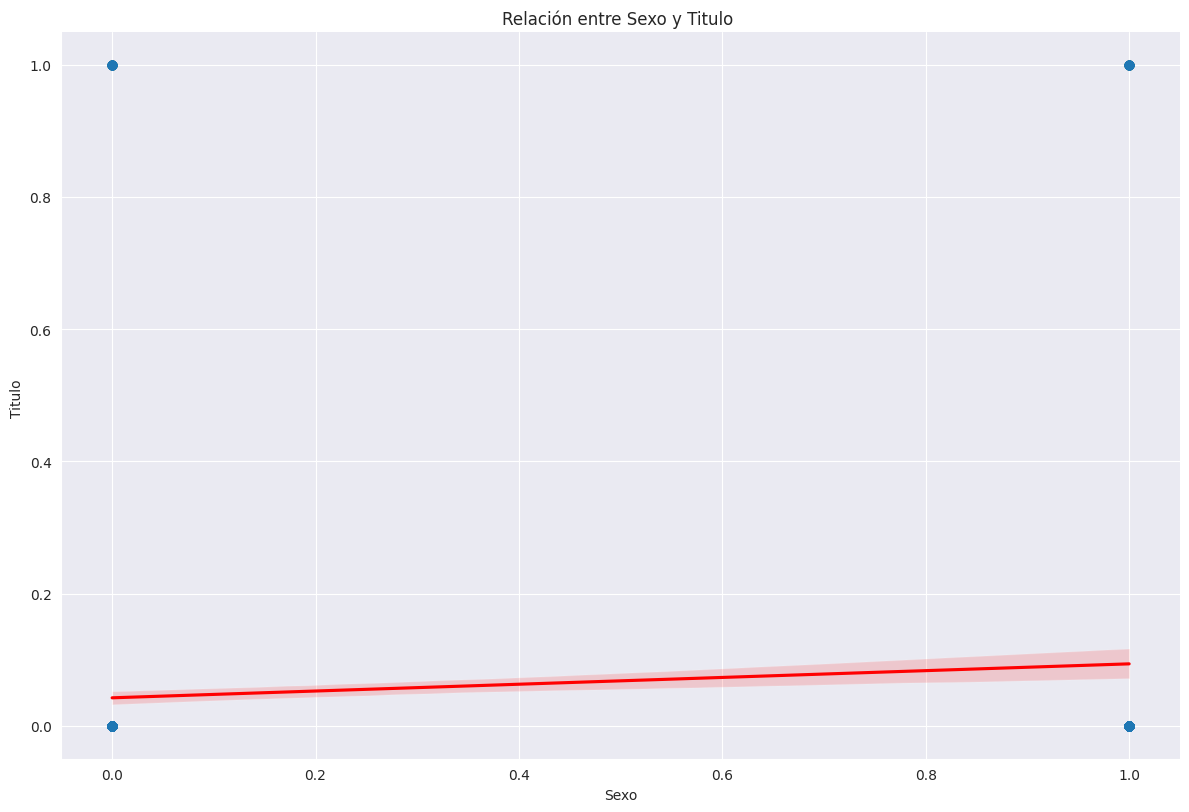

In [ ]:
sns.lmplot(data=df, x='Sexo', y='Titulo ', line_kws={'color': 'r'}, height=8, aspect=1.5)
plt.title('Relación entre Sexo y Titulo ')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
df_numerico = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
correlacion = df_numerico.corr()

In [ ]:
print(correlacion)

              Sexo  piramide   Titulo   ID_Banco     Enero   Febrero     Marzo
Sexo      1.000000 -0.127245  0.100562  0.017628  0.125538  0.128191  0.130863
piramide -0.127245  1.000000 -0.612689  0.068435 -0.794319 -0.818025 -0.829787
Titulo    0.100562 -0.612689  1.000000 -0.027500  0.447123  0.476135  0.503228
ID_Banco  0.017628  0.068435 -0.027500  1.000000 -0.037677 -0.041218 -0.046731
Enero     0.125538 -0.794319  0.447123 -0.037677  1.000000  0.995558  0.985959
Febrero   0.128191 -0.818025  0.476135 -0.041218  0.995558  1.000000  0.994903
Marzo     0.130863 -0.829787  0.503228 -0.046731  0.985959  0.994903  1.000000


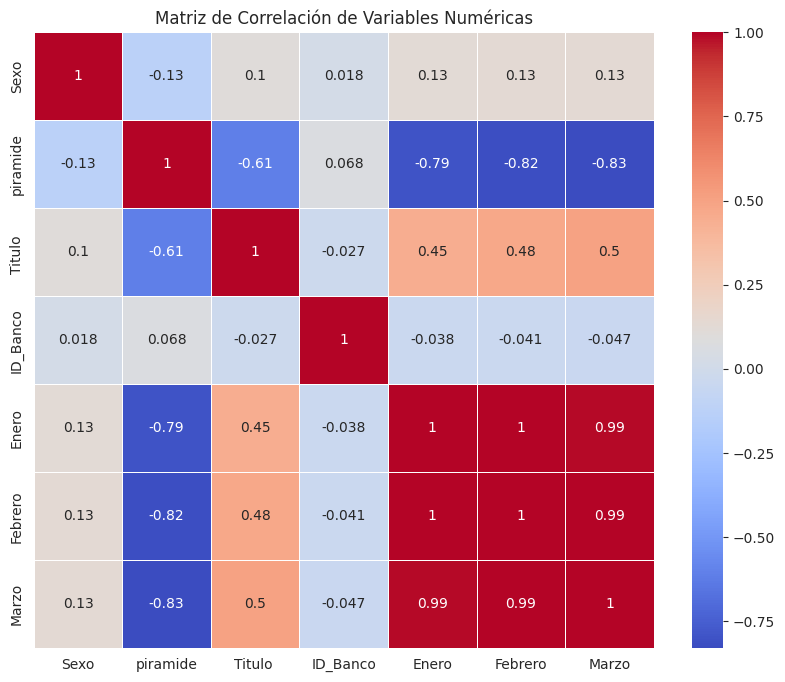

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Analisis multivariado

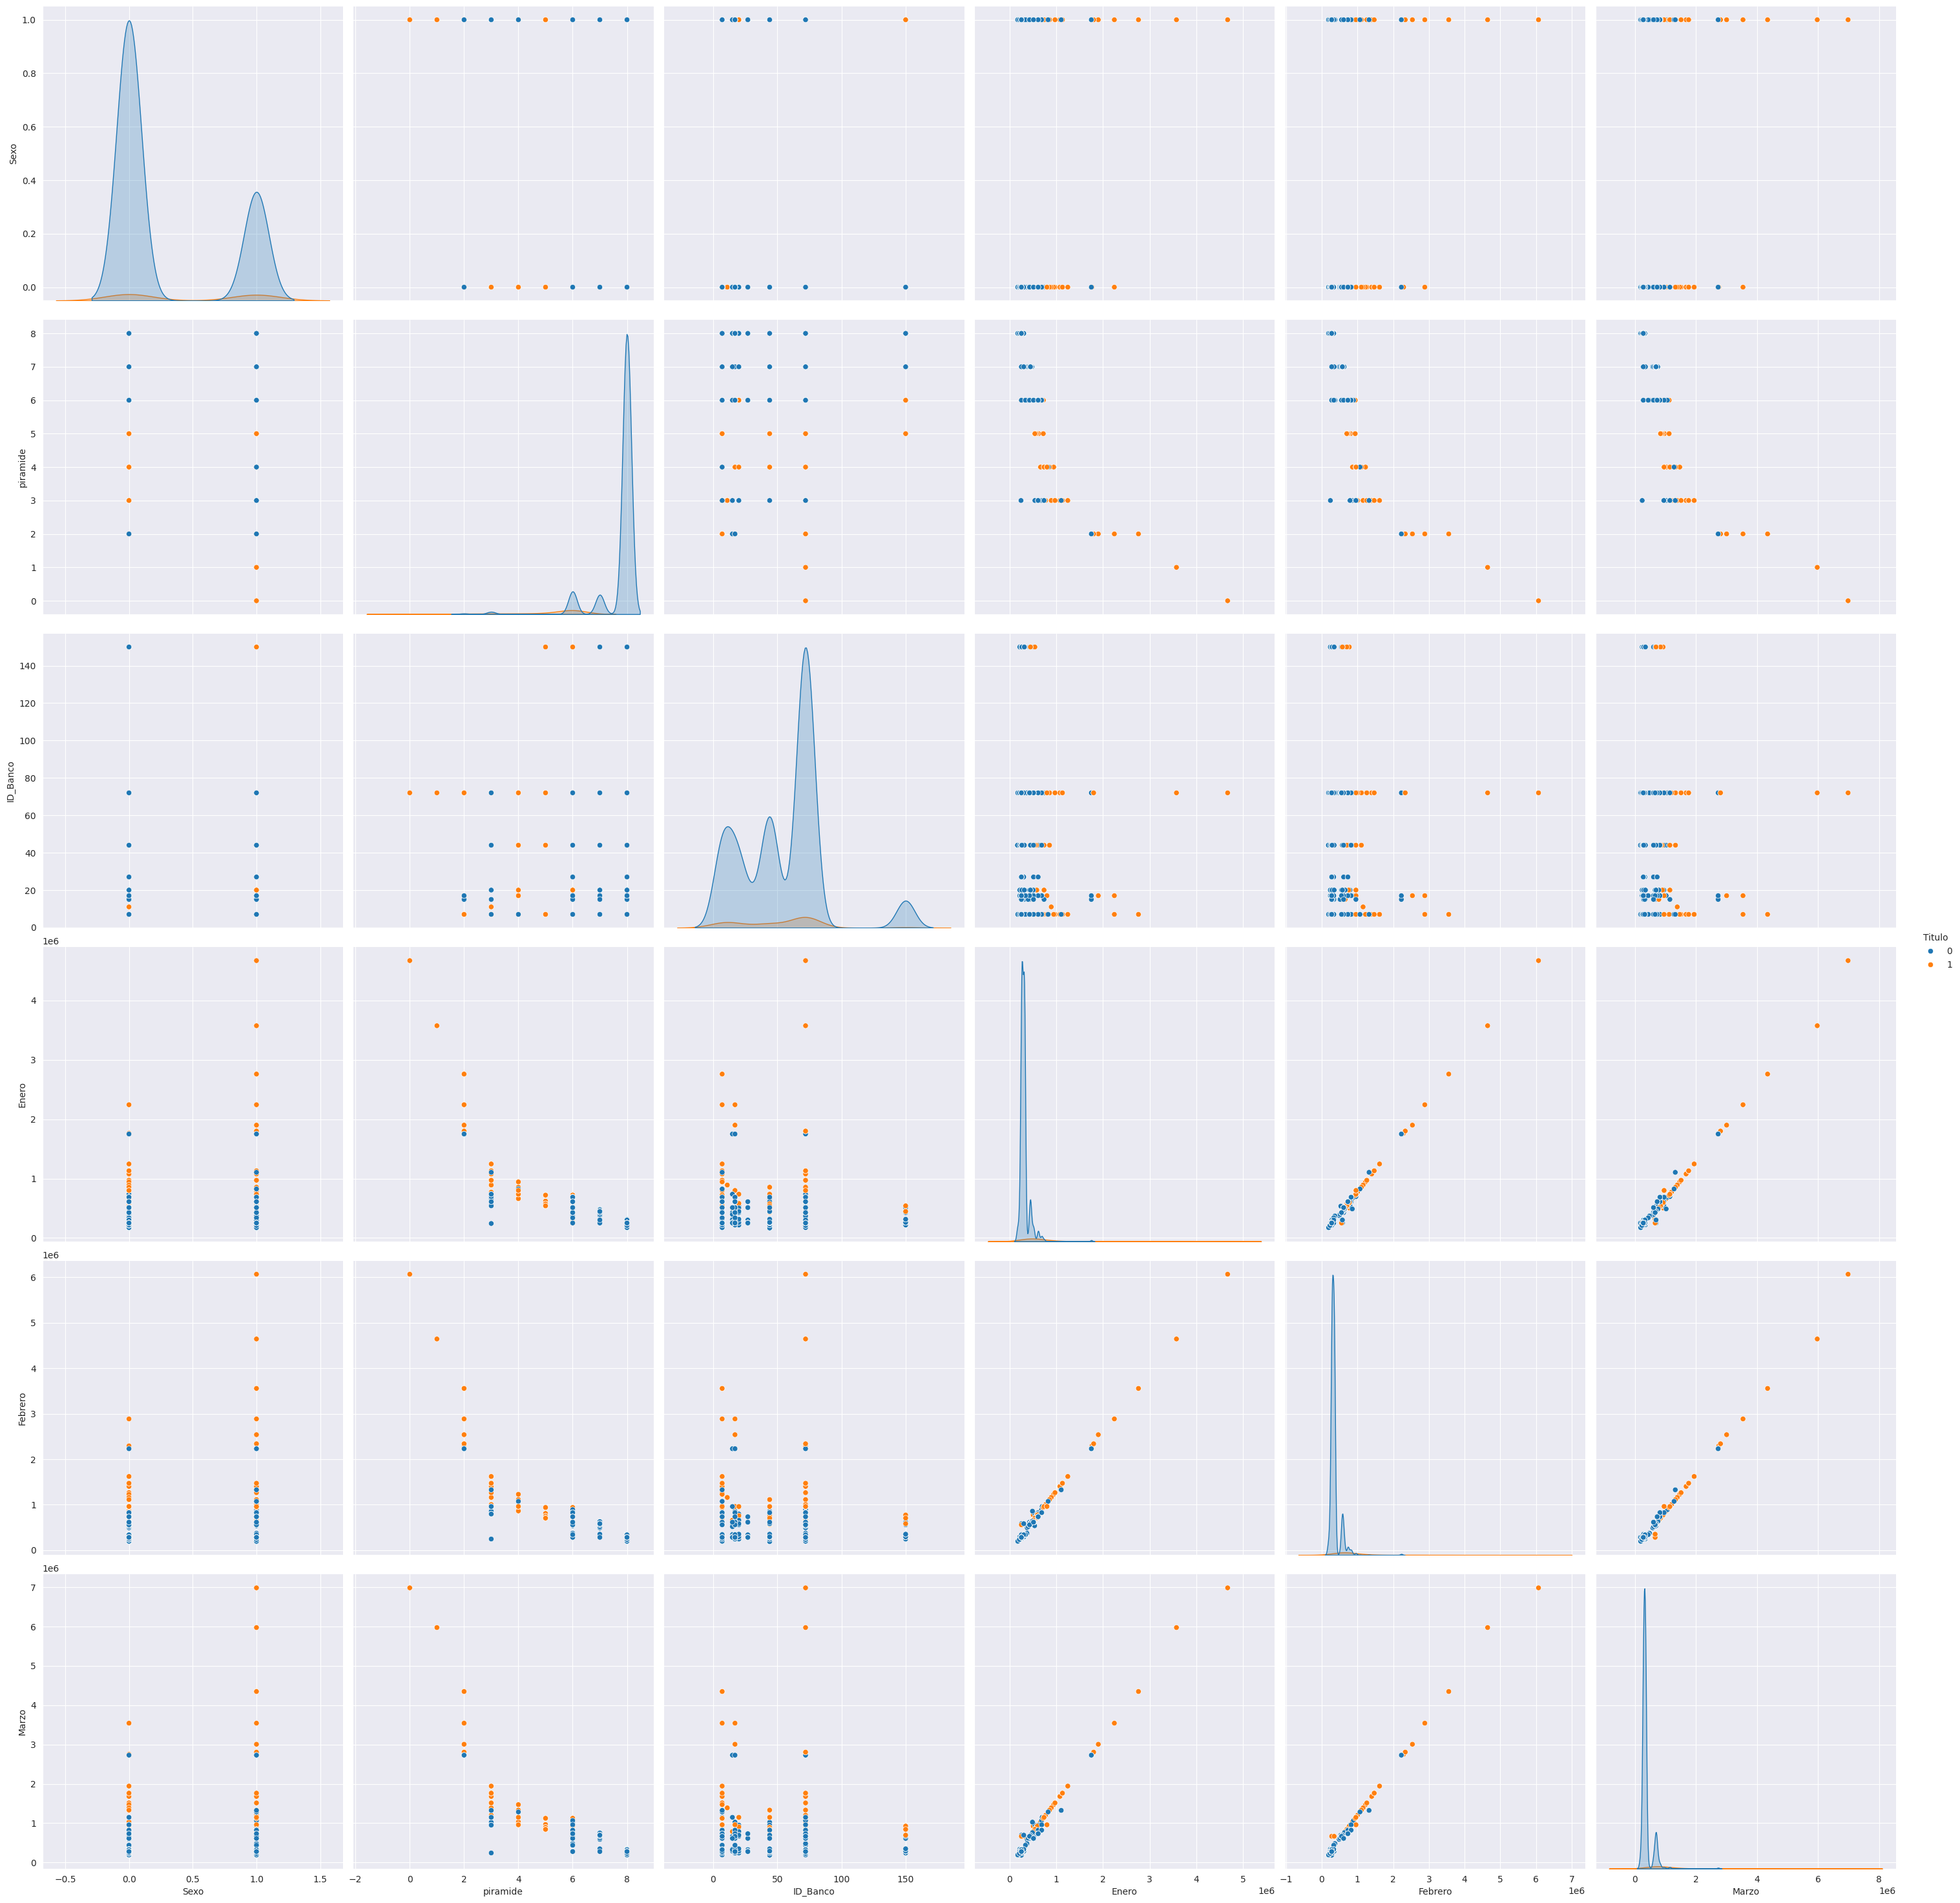

In [ ]:
sns.pairplot(df, hue = 'Titulo ', height = 5)
plt.show()

# Determinacion de variable target


In [ ]:
target = 'Titulo '
features = [col for col in balanced_df.columns if(col != target)]
features

['Legajo',
 'Estado',
 'Estructura',
 'Convenio',
 'Categoria',
 'ID_Cat',
 'Ingreso',
 'Sexo',
 'provincia',
 'puesto',
 'piramide',
 'ID_PuestoBasico',
 'ID_Banco',
 'Banco',
 'Enero',
 'Febrero',
 'Marzo']

# Dependencias

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Test Train Validacion

In [40]:
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)
display(train_df.shape)
display(val_df.shape)
display(test_df.shape)

(180, 18)

(21, 18)

(51, 18)

Revision de la variable target

In [41]:
target = 'Titulo '
features = [col for col in balanced_df.columns if(col != target)]
features

['Legajo',
 'Estado',
 'Estructura',
 'Convenio',
 'Categoria',
 'ID_Cat',
 'Ingreso',
 'Sexo',
 'provincia',
 'puesto',
 'piramide',
 'ID_PuestoBasico',
 'ID_Banco',
 'Banco',
 'Enero',
 'Febrero',
 'Marzo']

# Armado de los distintos sets de variables independientes y dependientes

In [42]:
X_train = train_df[features]
y_train = train_df[target]

In [43]:
X_val = val_df[features]
y_val = val_df[target]

In [44]:
X_test = test_df[features]
y_test = test_df[target]

# Modelo Random Forest

Tratandose de una clasificacion binaria, el modelo elegido para realizar las pruebas es el de Random Forest. Se trata modelo flexible, preciso y fácil de ajustar que es robusto tanto para tareas de clasificación como de regresión. Ofrece una buena capacidad de generalización al reducir el riesgo de sobreajuste que suele afectar a los árboles de decisión individuales.

In [47]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
X = df.drop('Titulo ', axis=1)
y = df['Titulo ']
for column in X.columns:
    if X[column].dtype == type(object):
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)


print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))

Exactitud del modelo: 0.9931972789115646

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       0.96      0.92      0.94        26

    accuracy                           0.99       441
   macro avg       0.98      0.96      0.97       441
weighted avg       0.99      0.99      0.99       441


Matriz de confusión:
 [[414   1]
 [  2  24]]


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_reg = rf_regressor.predict(X_test)


mse = mean_squared_error(y_test, y_pred_reg)
print("Error cuadrático medio (MSE):", mse)
print("Raíz del error cuadrático medio (RMSE):", mse ** 0.5)

Error cuadrático medio (MSE): 0.006730839002267573
Raíz del error cuadrático medio (RMSE): 0.08204169063511291


# Arbol de decision


Es una estructura similar a un diagrama de flujo, donde cada nodo representa una característica (o una decisión), cada rama representa un resultado de esa característica y cada hoja representa una etiqueta de clase o valor, son modelos interpretables y fáciles de implementar tanto para clasificación como para regresión. Aunque pueden sufrir de sobreajuste, ajustando parámetros como la profundidad máxima o el número mínimo de muestras por nodo, puedes mejorar su rendimiento. Además, puedes visualizar el árbol de decisión, lo que facilita la interpretación de las reglas de decisión del modelo.

Exactitud del modelo: 0.9909297052154195

Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       415
           1       0.92      0.92      0.92        26

    accuracy                           0.99       441
   macro avg       0.96      0.96      0.96       441
weighted avg       0.99      0.99      0.99       441


Matriz de confusión:
 [[413   2]
 [  2  24]]


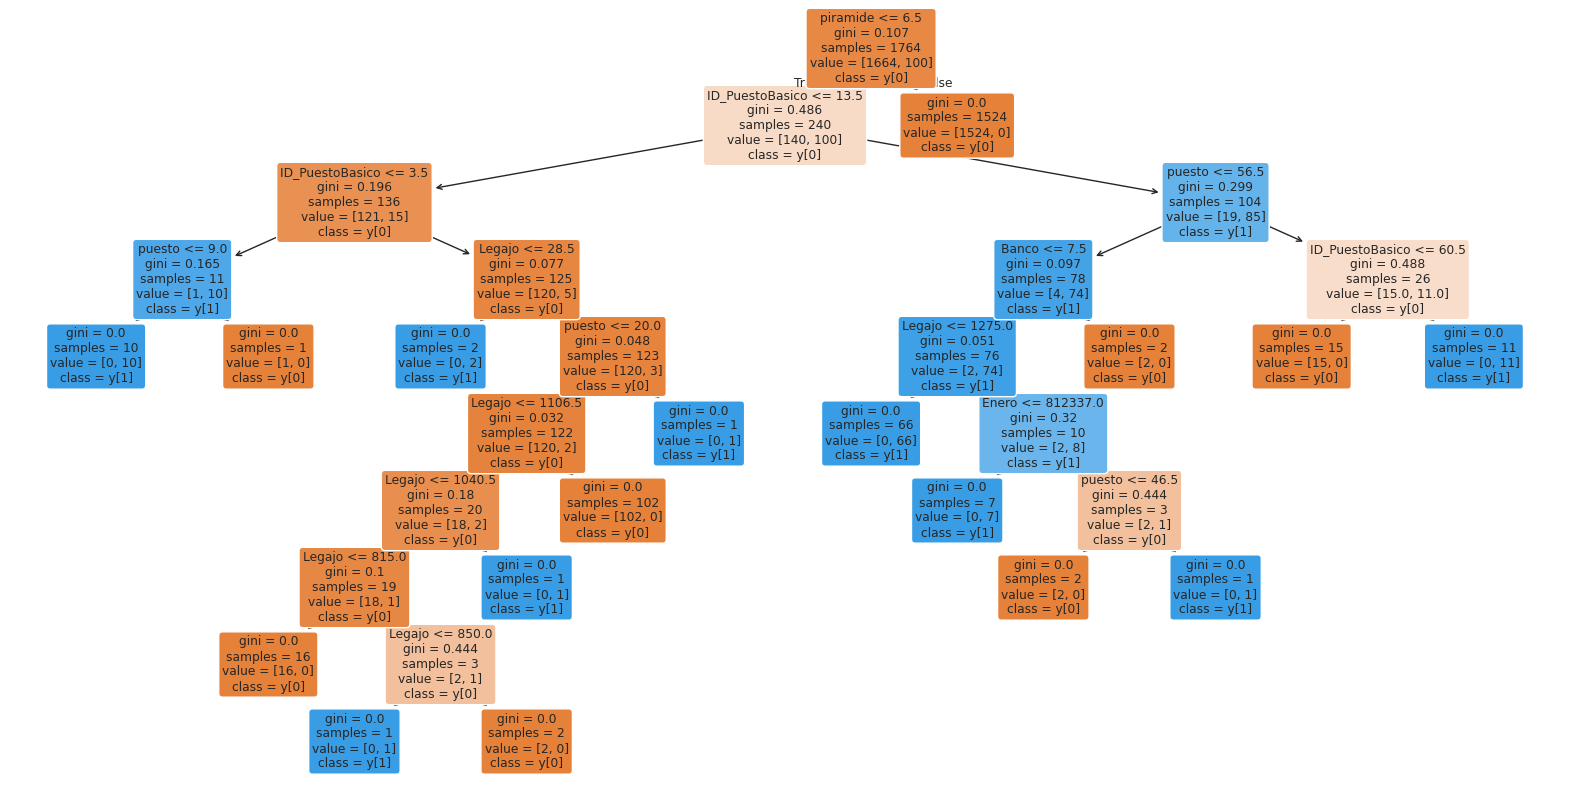

In [66]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
X = df.drop('Titulo ', axis=1)
y = df['Titulo ']

for column in X.columns:
    if X[column].dtype == type(object):
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Exactitud del modelo:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

# División de dataframes

In [58]:
X_train = train_df[features]
y_train = train_df[target]

X_val = val_df[features]
y_val = val_df[target]

X_test = test_df[features]
y_test = test_df[target]

# Validación y entrenamiento se unen para formar un único dataset

In [57]:
display(train_df)
display(val_df)

train_df = pd.concat([train_df, val_df])
display(train_df)

X_train = train_df[features]
y_train = train_df[target]

,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
198,211533,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,20/12/2017,1,CABA2,Coordinador,4,1,COO,17,BBVA BANCO FRANCES S.A.,800016,960020,960020
222,151655,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,13/3/2017,1,CBA,Operador,8,0,CDT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,314974,349622,349622
138,16848,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,25/10/2022,1,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
190,241683,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,17/6/2013,1,CBA,Analista de Calidad & Capacit.,6,1,ACC,72,BANCO SANTANDER RIO S.A.,446398,580317,696380
78,16077,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,23/8/2017,0,CBA,Jefe de Desarrollo de Sistemas,3,1,JDS,72,BANCO SANTANDER RIO S.A.,1077381,1400595,1680714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,17014,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,3/4/2023,1,CBA,Analista de Soporte Tecnico,6,1,AST,72,BANCO SANTANDER RIO S.A.,427649,555944,667133
247,243206,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,18/3/2016,0,CBA,Jefe Administracion de Personal y Novedades,3,1,JAN,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,1245886,1619652,1943582
180,212882,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,19/7/2016,1,CBA,Analista de Soporte Tecnico,6,1,AST,72,BANCO SANTANDER RIO S.A.,487369,633580,760296
52,24952,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,28/6/2010,0,CBA,Jefe RRLL & Medic. Laboral,3,1,JRM,72,BANCO SANTANDER RIO S.A.,1131020,1470326,1764391


,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
135,25721,ACTI,Dentro de convenio,ATCC,"25,0 Hs. CATEGORIA 3 CCT688/14",H23,2/1/2024,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,218732,242793,242793
238,243348,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,17/8/2017,0,CABA2,Team Leader Operaciones,7,0,TLC,150,HSBC BANK ARGENTINA S.A.,446398,580317,696380
233,16712,ACTI,Dentro de convenio,ATCC,"30,0 Hs. CATEGORIA 3 CCT688/14",H13,20/9/2021,0,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,262479,291351,291351
241,241352,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,28/12/2011,0,CBA,Operador,8,0,CDT,44,BANCO HIPOTECARIO S.A.,314974,349622,349622
163,24599,ACTI,Dentro de convenio,ATCC,"35,0 Hs. CATEGORIA 3 CCT688/14",H03,1/11/2021,0,CBA,Operador,8,0,CDT,20,BANCO DE LA PROVINCIA DE CORDOBA S.A.,218732,242793,339910
192,14258,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,1/12/2009,0,CBA,Analista de Adminis. de Pers.,6,1,ADP,72,BANCO SANTANDER RIO S.A.,446398,580317,696380
77,241542,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,23/1/2013,0,CBA,Supervisor de Reporting,5,1,SPR,44,BANCO HIPOTECARIO S.A.,573820,745966,895159
244,15746,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,1/1/2013,1,CBA,Gerente de Sistemas & Tecnolog,2,1,GST,17,BBVA BANCO FRANCES S.A.,1899257,2539034,3006841
37,15539,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,18/9/2012,0,CBA,Analista de Calidad,6,1,CAL,72,BANCO SANTANDER RIO S.A.,427649,555944,667133
42,244574,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,11/1/2024,0,CABA2,Operador,8,0,CDT,27,BANCO SUPERVIELLE S.A.,252151,279887,279887


,Legajo,Estado,Estructura,Convenio,Categoria,ID_Cat,Ingreso,Sexo,provincia,puesto,piramide,Titulo,ID_PuestoBasico,ID_Banco,Banco,Enero,Febrero,Marzo
198,211533,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,20/12/2017,1,CABA2,Coordinador,4,1,COO,17,BBVA BANCO FRANCES S.A.,800016,960020,960020
222,151655,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,13/3/2017,1,CBA,Operador,8,0,CDT,7,BANCO DE GALICIA Y BUENOS AIRES S.A.,314974,349622,349622
138,16848,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,25/10/2022,1,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
190,241683,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,17/6/2013,1,CBA,Analista de Calidad & Capacit.,6,1,ACC,72,BANCO SANTANDER RIO S.A.,446398,580317,696380
78,16077,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,23/8/2017,0,CBA,Jefe de Desarrollo de Sistemas,3,1,JDS,72,BANCO SANTANDER RIO S.A.,1077381,1400595,1680714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,244436,ACTI,Dentro de convenio,CC-781,30 Hs. CATEGORIA OP. A CCT 781,OP30,6/2/2023,0,CABA2,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,252151,279887,279887
63,16778,ACTI,Dentro de convenio,ATCC,"36,0 Hs. CATEGORIA 3 CCT688/14",H01,17/2/2022,1,CBA,Operador,8,0,CDT,72,BANCO SANTANDER RIO S.A.,314974,349622,349622
141,16127,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,15/11/2017,0,CBA,Analista de Relaciones Labor.,6,1,ARL,150,HSBC BANK ARGENTINA S.A.,505249,772499,926999
2,243415,ACTI,Fuera de convenio,FCON,Fuera de Convenio,FCC,22/8/2017,1,CBA,Analista de Relaciones Labor.,6,1,ARL,150,HSBC BANK ARGENTINA S.A.,446398,580317,696380


In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


le = LabelEncoder()
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        X_train[col] = le.fit_transform(X_train[col])



# Conclusion Final

Los valores de ramndom forest,en cuando al accurancy y al recall, reflejan con claridad que es superior al arbol de decision, por lo tanto se  opta por el random forest, debido a la precisión y la robustez del modelo, y no se requiere una gran interpretabilidad.